In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats
plt.rcParams['figure.dpi'] = 300

In [7]:
symbols = ['PFE','GSK','AZN','BMY','MRK','RHHBY','SNY','NVS','ABBV','JNJ']
portfolio = yf.download(symbols, start="2000-01-01", end="2024-02-29")['Adj Close']
portfolio = portfolio.T
portfolio = round(portfolio.pct_change()*100, 2)

'''
portfolio['Price_Change'] = portfolio.pct_change() 
up_threshold = 0.2  # Price change considered as "up"
down_threshold = -0.2 # Price change considered as "down"
def label_price_trend(price_change):
    if price_change > up_threshold:
        return 'up'
    elif price_change < down_threshold:
        return 'down'
    else:
        return 'no change'

# Price Trend
portfolio['target'] = portfolio['Price_Change'].apply(label_price_trend)
portfolio_filled = portfolio.fillna(method='bfill')'''

portfolio.head(-5)

[*********************100%%**********************]  10 of 10 completed
/tmp/ipykernel_53805/2837192205.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  portfolio = round(portfolio.pct_change()*100, 2)


Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-10,2000-01-11,2000-01-12,2000-01-13,2000-01-14,...,2024-02-14,2024-02-15,2024-02-16,2024-02-20,2024-02-21,2024-02-22,2024-02-23,2024-02-26,2024-02-27,2024-02-28
Ticker,,,,,,,,,,,,,,,,,,,,,
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-64.86,-64.63,-64.00,-63.21,-63.06,-63.38,-62.69,-62.78,-62.60,-62.94
BMY,198.09,185.07,181.92,186.70,215.32,212.81,213.21,210.43,200.03,211.63,...,-20.42,-21.03,-22.13,-23.06,-21.50,-20.88,-22.43,-24.25,-24.73,-22.98
GSK,-27.40,-23.49,-20.42,-22.65,-29.01,-28.07,-27.76,-26.62,-25.61,-25.12,...,-14.34,-15.36,-15.73,-15.57,-17.47,-16.91,-17.32,-15.22,-15.12,-15.88
JNJ,34.69,33.21,30.25,36.31,35.07,31.37,33.10,30.17,30.70,26.76,...,273.39,278.89,276.92,279.35,282.05,280.57,283.33,279.76,279.85,281.55


In [8]:
X_train, X_test, y_train, y_test = train_test_split(portfolio_filled.drop('target', axis=1), portfolio_filled['target'], random_state=0)

NameError: name 'portfolio_filled' is not defined

In [ ]:
k_range = range(1, 50)

# initialize empty lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

#what should I do with missing values? deleting rows
for k in k_range:
    # initialize knn model
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit the KNN model on the training data
    knn.fit(X_train, y_train)

    # predict the labels for the training and testing data using the trained model
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # calculate the accuracy of the model on training and testing data
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

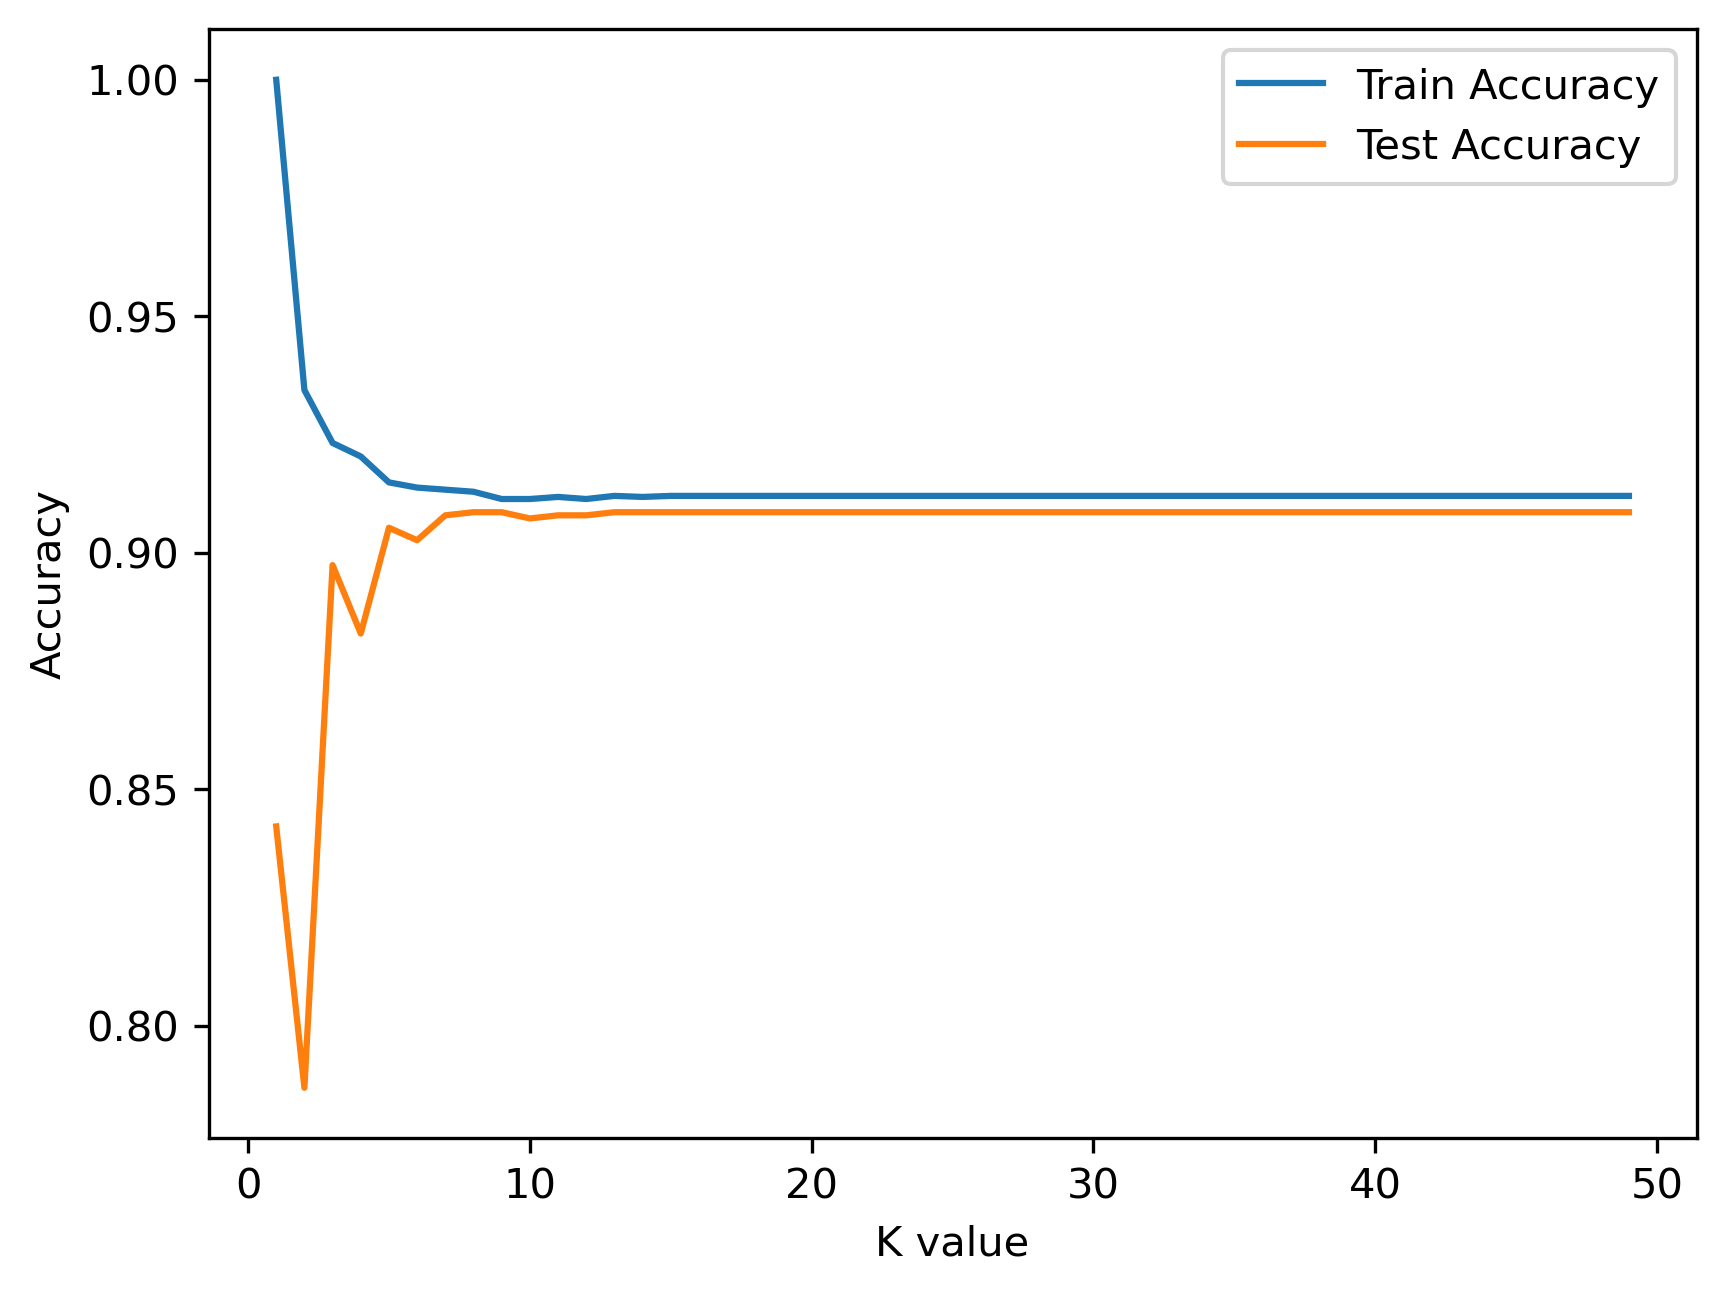

In [ ]:
# is this graph good or bad?
# plot the training and testing accuracies for different k-values
plt.plot(k_range, train_accuracies, label="Train Accuracy")
plt.plot(k_range, test_accuracies, label="Test Accuracy")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# choose optimal k-value, pick k = 5
# train the KNN using 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# I dont understand how classes work?
# create a dictionary that maps class labels to their species names
classes = {0: 'no returns', 1: 'returns'}

# predict the class for a "new" data point
y_pred = knn.predict([[34, 40, 52, 24, 34, 7, 6, 7, 4, 5],[56, 45, 24, 28, 44, 34, 54, 43, 65, 76]])

print(classes[y_pred[0]])
print(classes[y_pred[1]])

returns
returns


/usr/lib64/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

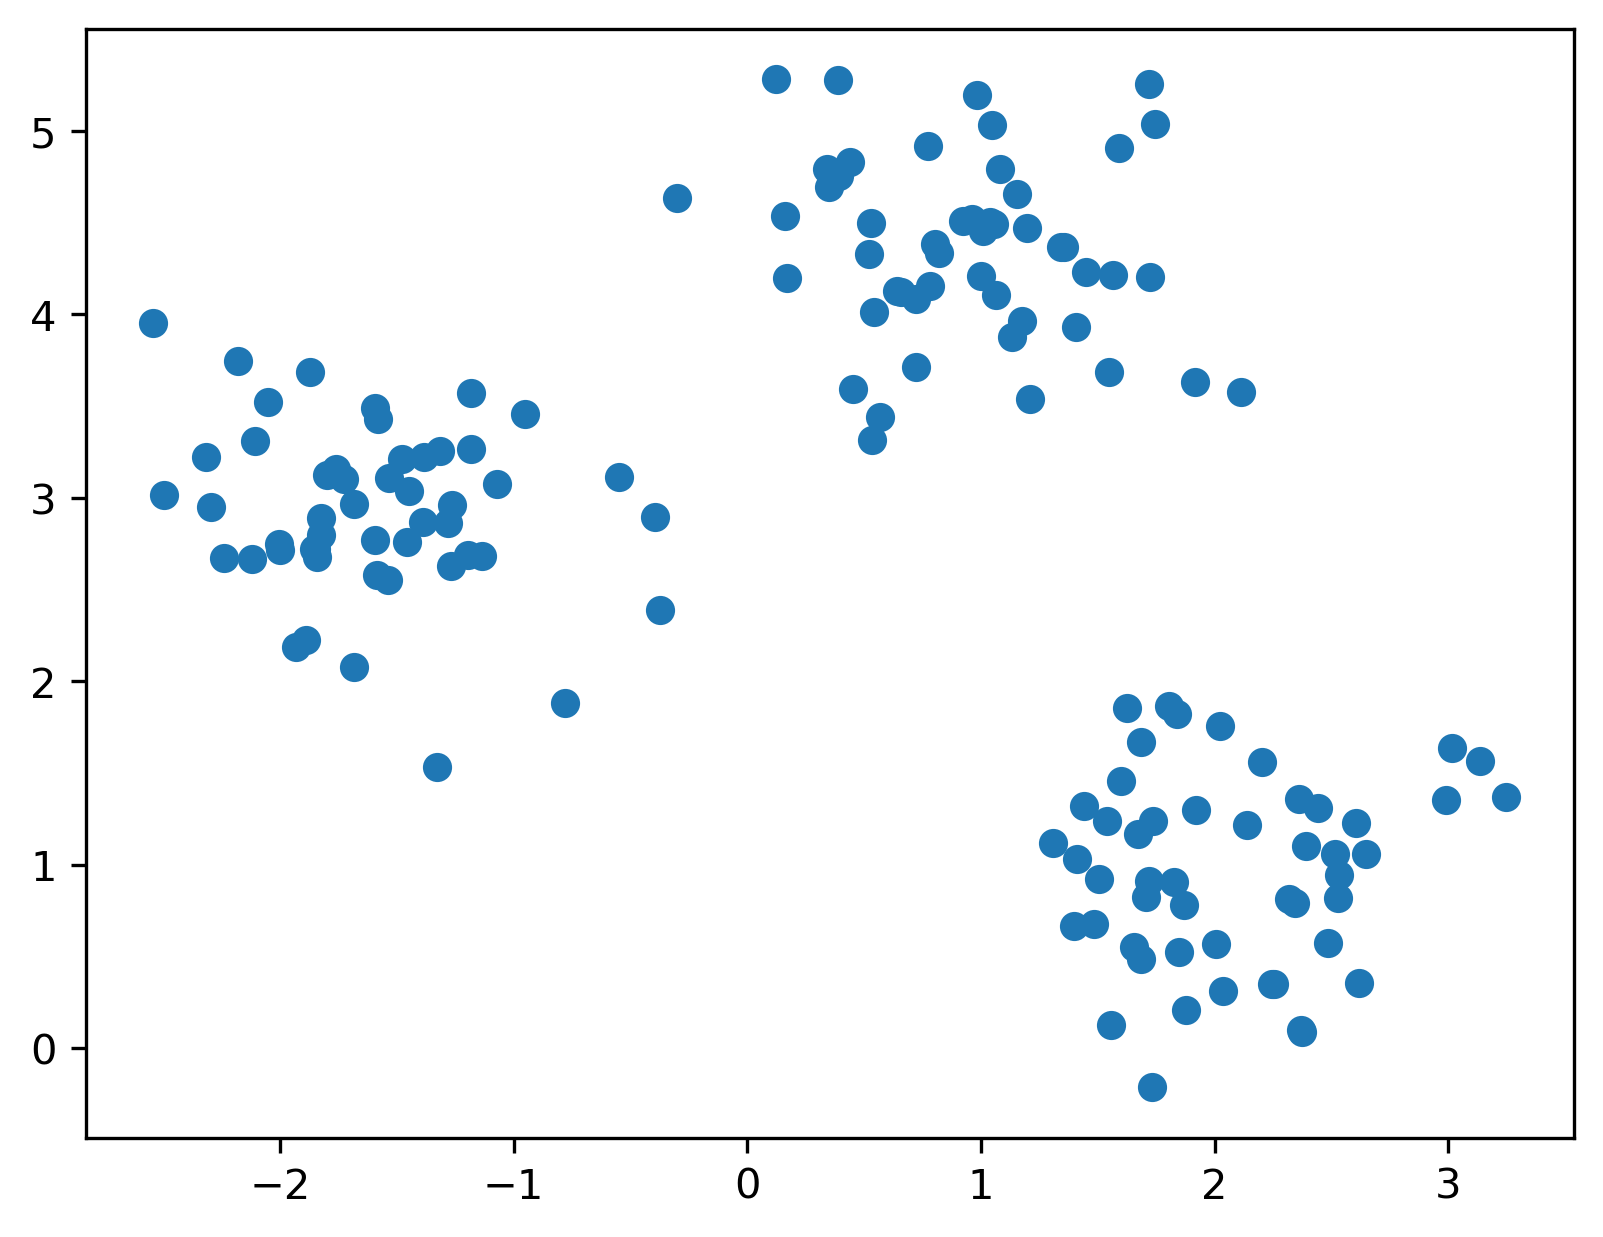

In [11]:
# generate synthetic data and plot it
X, y = make_blobs(n_samples=150, centers=3,cluster_std=0.5, shuffle = True, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);
plt.show()

In [12]:
# train a K-Means Clustering model on the training data
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km.fit(X)

KMeans(init='random', n_clusters=3, random_state=0)

In [13]:
# predict the labels for each datapoint in the training dataset
y_pred = km.predict(X)

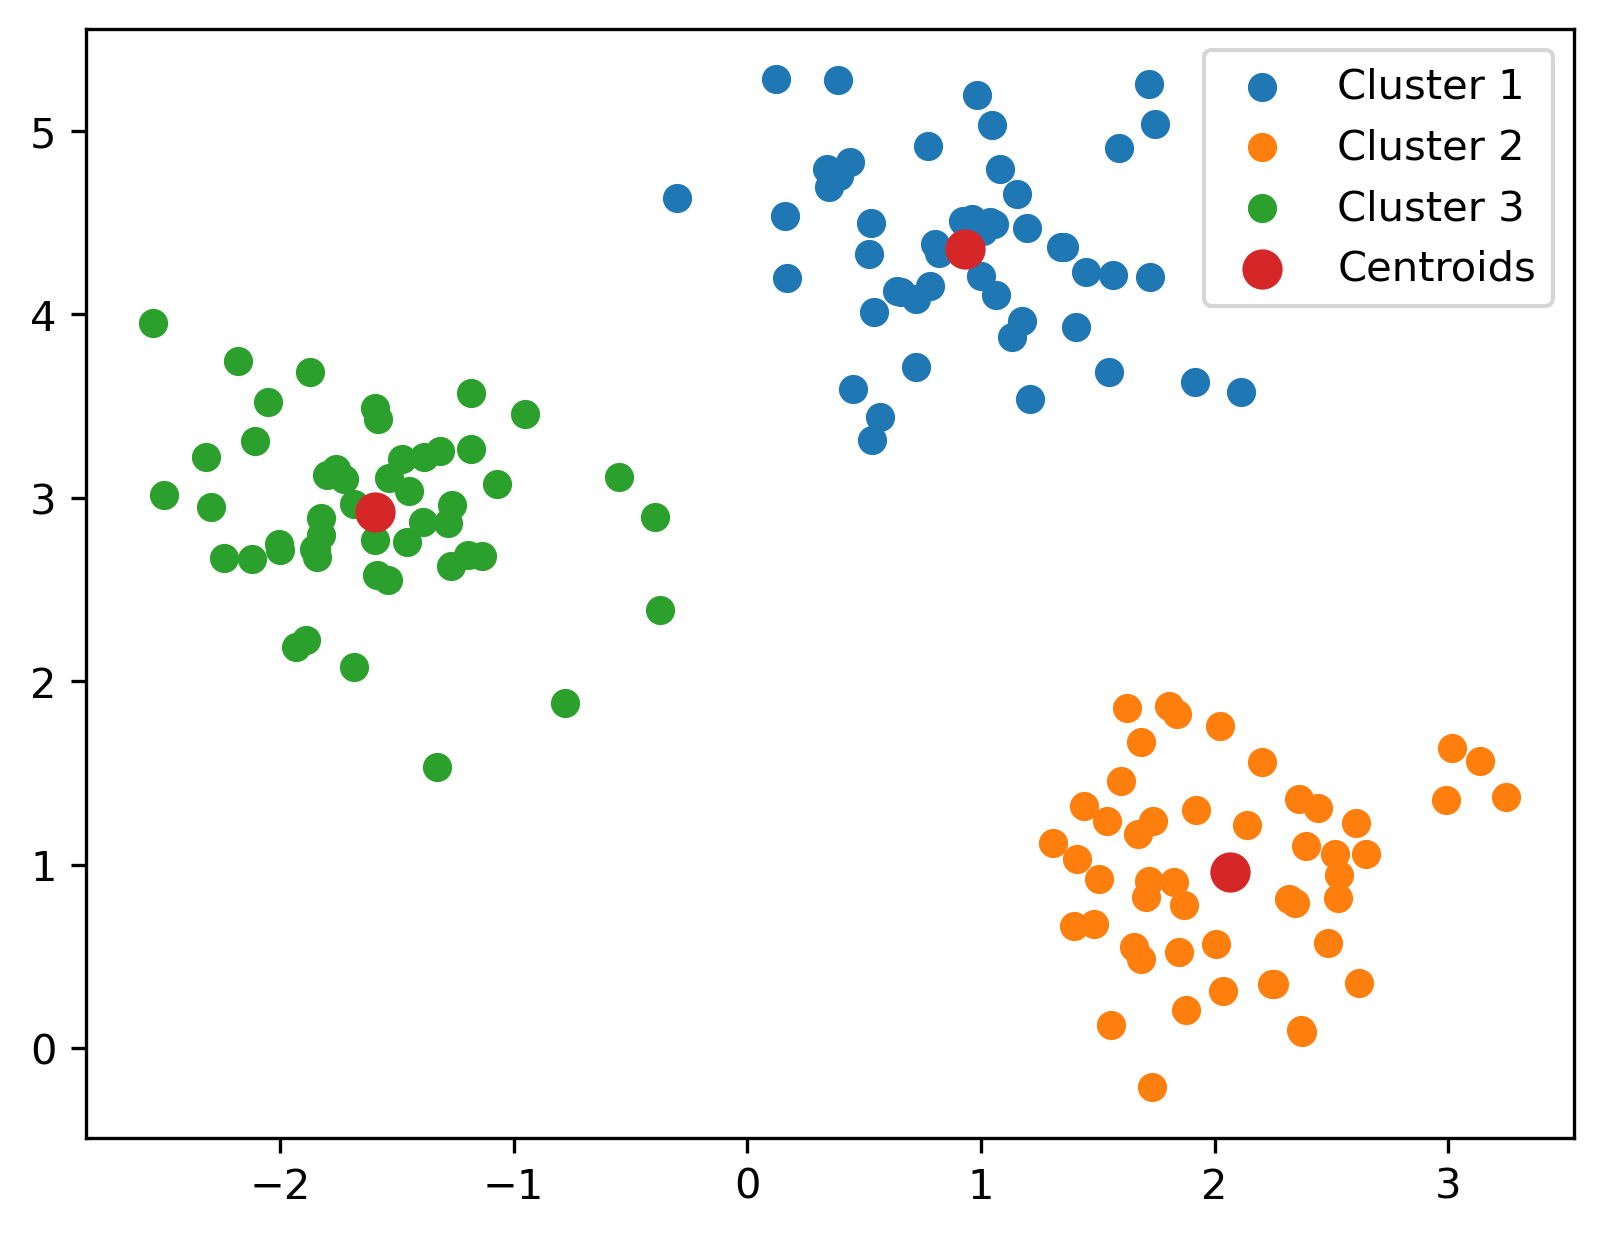

In [15]:
# create scatter plots for each cluster, according to their predicted cluster labels
plt.scatter(
    X[y_pred == 0, 0], X[y_pred == 0, 1],
    label='Cluster 1'
)

plt.scatter(
    X[y_pred == 1, 0], X[y_pred == 1, 1],
    label='Cluster 2'
)

plt.scatter(
    X[y_pred == 2, 0], X[y_pred == 2, 1],
    label='Cluster 3'
)

# plot the center of each cluster
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=75,
    label='Centroids'
)

plt.legend(scatterpoints=1)
plt.show()

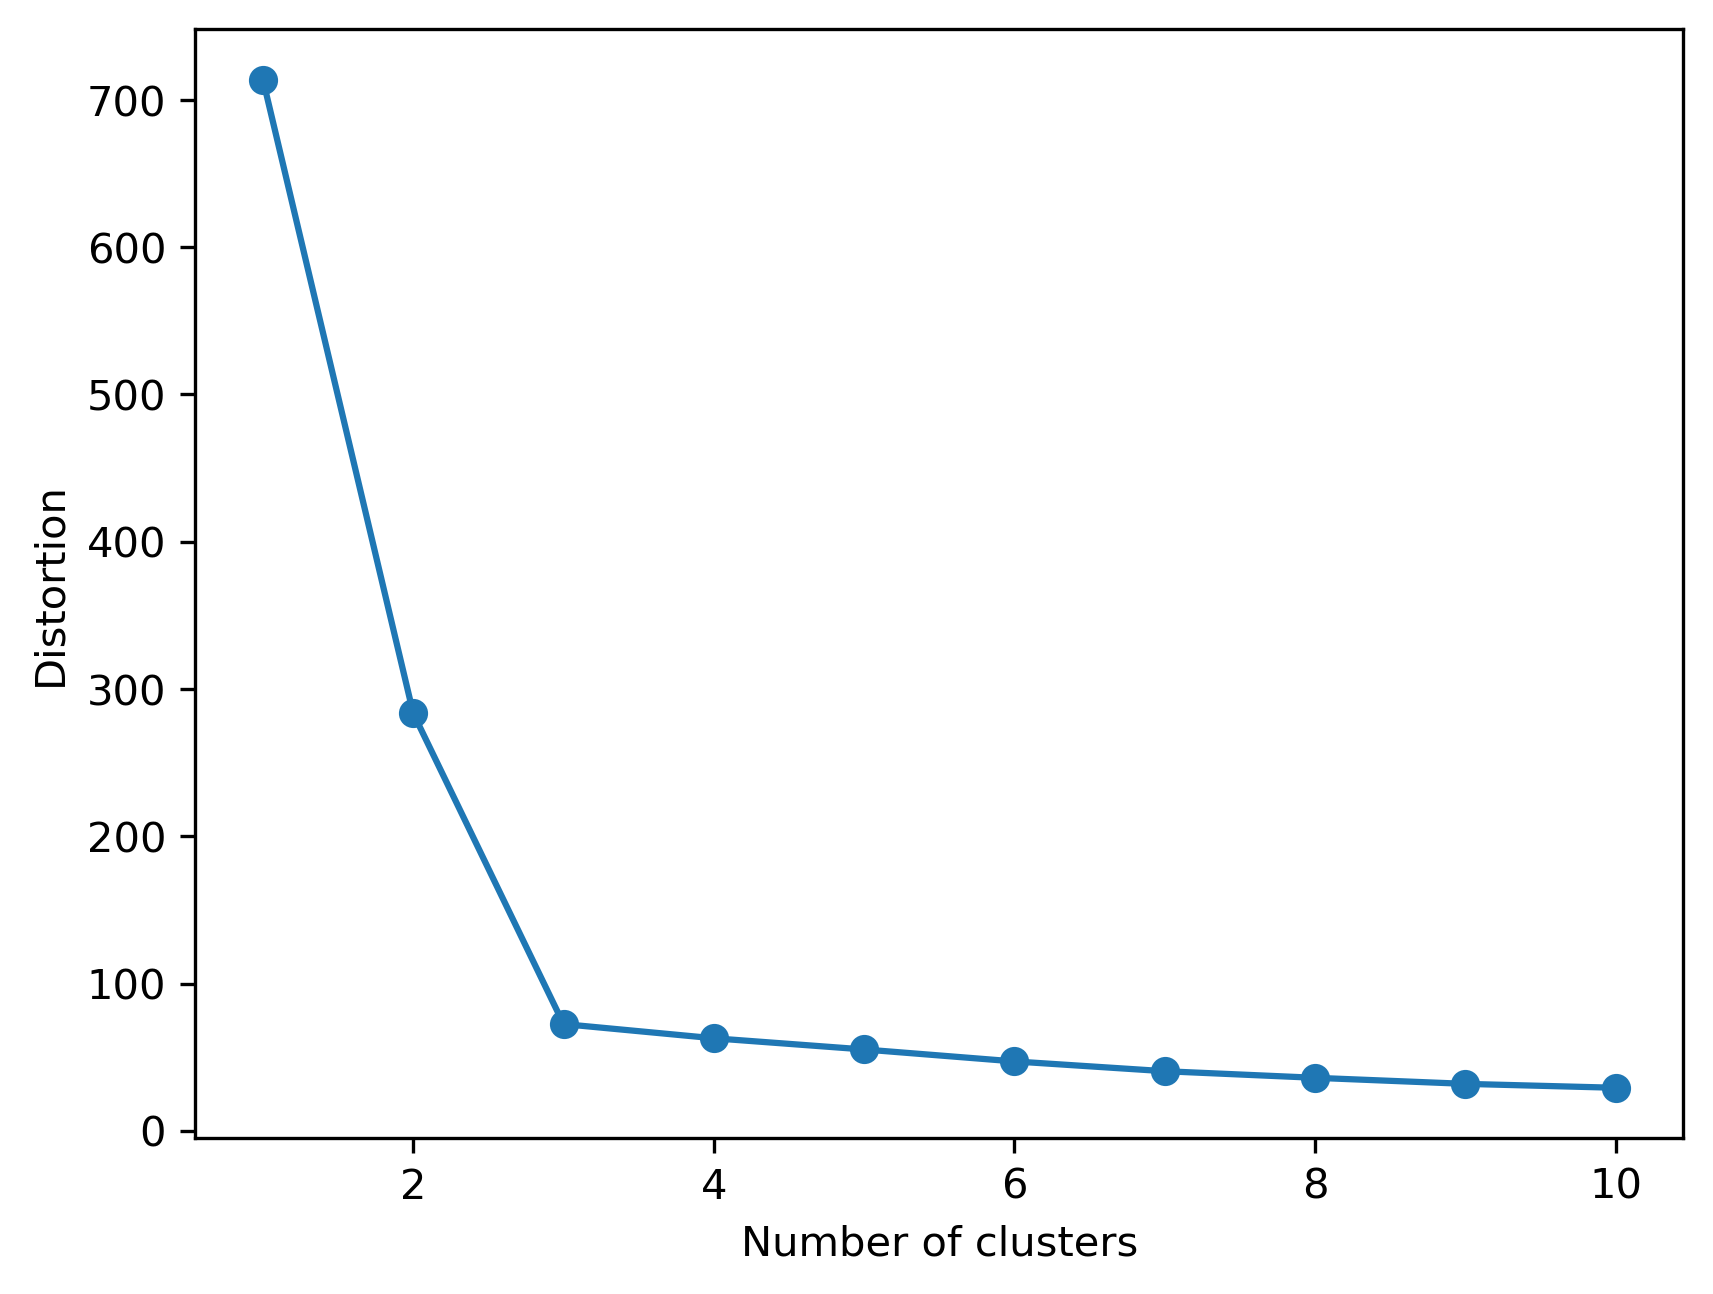

In [16]:
# visualize the distortion values against different numbers of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)


plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()